### Noms et Prénoms du binome:

CILLEROS Victor
JEAN jérémy (caramel)
---

# TP en Watermarking - TP2

---

## Patrick Bas, CNRS, CRIStAL

---


 

## Tatouage par également de spectre et attaques de sécurité

### 2.1 Notations et rappels:

Les notations sont identiques à celles vues en cours. Le procédé d'insertion est le schéma par étalement de spectre vu en cours.

* X = matrice de $N_{i}$ vecteurs originaux de taille $N_{v}$ ($N_{i}$ colonnes, $N_{v}$ lignes). $N_{i}$ représente par exemple le nombre de contenu traités, et $N_{v}$ le nombre de composantes tatouées par contenu. **Note**: chaque colonne de X peut par exemple représenter des composantes d'une image.
* $N_{o}$ représente le nombre de contenus tatoués observés par l'adversaire et utilisés pour construire son attaque
* $N_{i}$ représente le nombre de contenus tatoués utilisés pour calculer pratiquement le taux d'erreur (voir BER)
* Y = matrice de contenus tatoués
* Z = matrice de contenus tatoués et perturbés
* k clé secrète de norme unitaire
* $m_{1}$: bit inséré, converti en +1, -1 
* $\alpha$: paramètre de distorsion
* BER: Bit Error Rate, taux d'erreur binaire ou encore probabilité d'erreur empirique de décodage
* DWR: « Document to Watermark Ratio » $DWR=10\log_{10}(\sum x_{i}^{2}/\sum w_{i}^{2})$, permet de mesurer la distorsion ($DWR=0$ $\Leftrightarrow$ $\sigma_{X}^{2}=\sigma_{W}^{2}$ ). Permet de mesurer la distortion. Distortion nulle $DWR=\infty$, distortion importante $DWR \rightarrow 0$ 

#### Rappels:
* L'objectif du récepteur et de bien décoder $m_{1}$, possiblement en ayant une distortion qui ne soit pas trop importante
* Ici, les objectifs de l'adversaire sont d'estimer la clé k puis d'effacer le message inséré. Pour s'assurer que l'adversaire a bien réussi à estimer la clé, il calculera la correlation normalisée entre le vecteur k et son estimation.

**N'oubliez pas d'exporter votre TP en html lors de sa remise**



In [2]:
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from sklearn.decomposition import FastICA

## Scénario 1: Attaque à Messages connus, 1 bit
* Mise en route: Quel est le BER cible de l'adversaire ?
* Mettre en place l'attaque liée à ce scénario
* Etudier l'impact de $N_{o}$ et de $\alpha$ sur le BER après attaque

In [3]:
Nv = 100 # Size of the vector
Ni = 10000 # Max number of observations

In [63]:
def ber(Y,m,k):#Compute the Bit Error Rate between message m and the extracted message from Y using key k
    c = np.sign(np.dot(Y.T,k))
    return np.sum(c != m)/float(Ni)

def norm_corr(hatk,k):
    hatk = hatk / np.sqrt(np.dot(hatk.T,hatk)) # Normalize
    corrN = np.abs(np.dot(hatk.T,k))/(np.linalg.norm(hatk)*np.linalg.norm(k)) # Compute the Normalised correlation
    return corrN

def do_process(alpha,No):
    
    print('alpha: ',alpha)
    print('No: ',No)

    X = np.random.randn(Nv,Ni) # Generate Ni random host vectors
    k = np.random.randn(Nv,1) # Generate de Watermark
    print(k.shape)
    k = k / np.sqrt(np.dot(k.T,k)) # Normalize the watermark

    m1 = np.ones((Ni,1)) #Scenario with Known Messages: generate only ones, to be changed for the WOA attack!!!

    K = np.dot(k,m1.T) # Generate the matrix of watermarks (each column contains m1_i*k)

    W = alpha*K

    Y = X + W # perform embedding

    DWR = 10*np.log10(Nv/alpha**2) # Set the Document to Watermark Ratio, in dB

    print('DWR: ',DWR,' dB')

    cY = np.sign(np.dot(Y.T,k)) # Computation of the decoded 'bits' (here -1 or +1)
    print('practical bit error rate:')
    print(np.sum(cY != m1)/np.float(Ni)) 

    Y_obs = Y[:,:No]
    # To Do: implement the attack on No observation, i.e. on Y[:,:No]
    hatk = (1/No)*np.sum([(-1)**(m1[i,0]+1)*Y_obs[:,i] for i in range(No)],axis=0).reshape(-1,1)

    hatk = hatk / np.sqrt(np.dot(hatk.T,hatk)) # We need to Normalize
    
    corrN = np.abs(np.dot(hatk.T,k))/(np.linalg.norm(hatk)*np.linalg.norm(k)) # Compute the Normalised correlation
    print('Normalised correlation between the true key and the estimated key')
    print(corrN)
    print(hatk.shape)
    hatk = np.reshape(hatk,(Nv,1))# We need to reshape

    YA = Y - alpha*np.dot(hatk,m1.T) # KMA: perform the removal attack
    print('practical bit error rate after security attack')
    print(ber(YA,m1,k))
    print('\n\n')
    return corrN[0]
    

alpha = 2 # Tune the power of the watermark here

# One example, can be used to draw plots
def history_process(alpha, min_No, max_No, step, show=True):
    historyCorr = []
    assert (max_No-min_No)%step == 0 , "c chelou frr "
    for No in range(min_No,max_No,step):
        historyCorr.append(do_process(alpha,No))
    if show : 
        plt.style.use('ggplot')
        plt.figure()
        plt.plot(np.linspace(min_No,max_No,int((max_No-min_No)/step)),historyCorr)
        plt.title("Evolution de la corrélation entre la clé estimé et la clé réelle")
        plt.xlabel("Nombre observations")
        plt.ylabel("Corrélation")
        plt.show()

alpha:  2
No:  100
(100, 1)
DWR:  13.979400086720377  dB
practical bit error rate:
0.0225
Normalised correlation between the true key and the estimated key
[[0.87474535]]
(100, 1)
practical bit error rate after security attack
0.4136



alpha:  2
No:  200
(100, 1)
DWR:  13.979400086720377  dB
practical bit error rate:
0.0217
Normalised correlation between the true key and the estimated key
[[0.94579812]]
(100, 1)
practical bit error rate after security attack


C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_26256/3096892697.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(np.sum(cY != m1)/np.float(Ni))
C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_26256/3096892697.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.sum(c != m)/np.float(Ni)


0.4701



alpha:  2
No:  300
(100, 1)
DWR:  13.979400086720377  dB
practical bit error rate:
0.0226
Normalised correlation between the true key and the estimated key
[[0.9640103]]
(100, 1)
practical bit error rate after security attack
0.479



alpha:  2
No:  400
(100, 1)
DWR:  13.979400086720377  dB
practical bit error rate:
0.0245
Normalised correlation between the true key and the estimated key
[[0.96258489]]
(100, 1)
practical bit error rate after security attack
0.4616



alpha:  2
No:  500
(100, 1)
DWR:  13.979400086720377  dB
practical bit error rate:
0.0214
Normalised correlation between the true key and the estimated key
[[0.97932281]]
(100, 1)
practical bit error rate after security attack
0.4875



alpha:  2
No:  600
(100, 1)
DWR:  13.979400086720377  dB
practical bit error rate:
0.0242
Normalised correlation between the true key and the estimated key
[[0.97778665]]
(100, 1)
practical bit error rate after security attack
0.4872



alpha:  2
No:  700
(100, 1)
DWR:  13.9794000

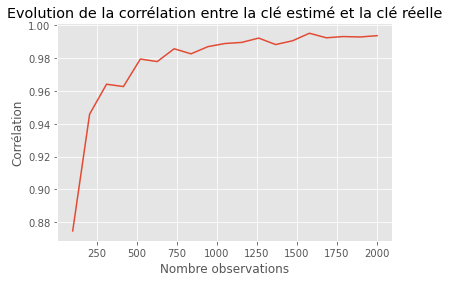

In [29]:
history_process(2,100,2000,100)

## Scénario 2, Attaque à messages inconnus, 1bit
* Note: la fonction `np.linalg.eig` peut être utilisée pour effectuer une décomposition en valeurs et vecteurs propres.
* Note: pour effacer le message inséré, il conviendra au préalable d'estimer le bit inséré, cela peut se faire via `m_est = np.sign(np.dot(Y.T,hatk))` où `hatk` est la clé estimée
* Mettre en place l'attaque
* Etudier l'impact de $N_{o}$ et de $\alpha$ sur le BER après attaque

In [64]:
# 2dn scenario, scenario with KMA 
print("**************************************************")
print('2nd Scenario')
print("**************************************************")

def do_process_2(alpha,No):
    
    #print('alpha: ',alpha)
    #print('No: ',No)

    X = np.random.randn(Nv,Ni) # Generate Ni random host vectors
    k = np.random.randn(Nv,1) # Generate de Watermark
    k = k / np.sqrt(np.dot(k.T,k)) # Normalize the watermark

    m1 = np.sign(np.random.randn(Ni,1)) #Scenario with unknow messages, first bit

    K = np.dot(k,m1.T) # Generate the matrix of watermarks (each column contains m1_i*k)

    W = alpha*K

    Y = X + W # perform embedding

    Y_obs = Y[:,:No]
    #hatk = TO DO
    
    vaP,vectP = np.linalg.eig(Y_obs@Y_obs.T)
    hatk=vectP[:,0].reshape(-1,1)
    #print(f"test norm vecteur propre le plus important : {np.linalg.norm(hatk,2)}")

    corrN = norm_corr(hatk,k)# To ease the writing we use the norm_corr function

    #print('Normalised correlation between the true key and the estimated key')
    #print(corrN)

    #m_est = TO DO
    m_est = (np.sign(Y.T@hatk))

    #YA = TO DO 

    YA = Y - alpha*(hatk@m_est.T)

    #print('bit error rate after security attack')
    ber_2 = ber(YA,m1,k)
    #print()
    #print('\n\n')
    return corrN[0], ber_2

    
alpha = 2 # Tune the power of the watermark here

def history_process_2(alpha, min_No, max_No, step, show=True):
    
    assert (max_No-min_No)%step == 0 , "erreur dans les paramètres"
    if (type(alpha)==int):
        plt.style.use('ggplot')
        plt.figure()
        for a in range(1,a):
            historyCorr = []
            historyBer = []
            for No in range(min_No,max_No,step):
                c, b = do_process_2(a,No)
                historyCorr.append(c)
                historyBer.append(b)
            if show :
                plt.plot(np.linspace(min_No,max_No,int((max_No-min_No)/step)),historyBer,label=f"alpha vaut : {a}")
        plt.title("Evolution du ber")
        plt.xlabel("Nombre observations")
        plt.ylabel("Ber")
        plt.legend()
        plt.show()
    else:
        plt.style.use('ggplot')
        plt.figure(figsize=(50,50))
        for a in alpha:
            historyCorr = []
            historyBer = []
            for No in range(min_No,max_No,step):
                c, b = do_process_2(a,No)
                historyCorr.append(c)
                historyBer.append(b)
            if show : 
                plt.plot(np.linspace(min_No,max_No,int((max_No-min_No)/step)),historyBer, label = f"alpha = {round(a,1)}")
        plt.title("Evolution du ber")
        plt.xlabel("Nombre observations")
        plt.ylabel("Ber")
        plt.legend()
        plt.show()

**************************************************
2nd Scenario
**************************************************


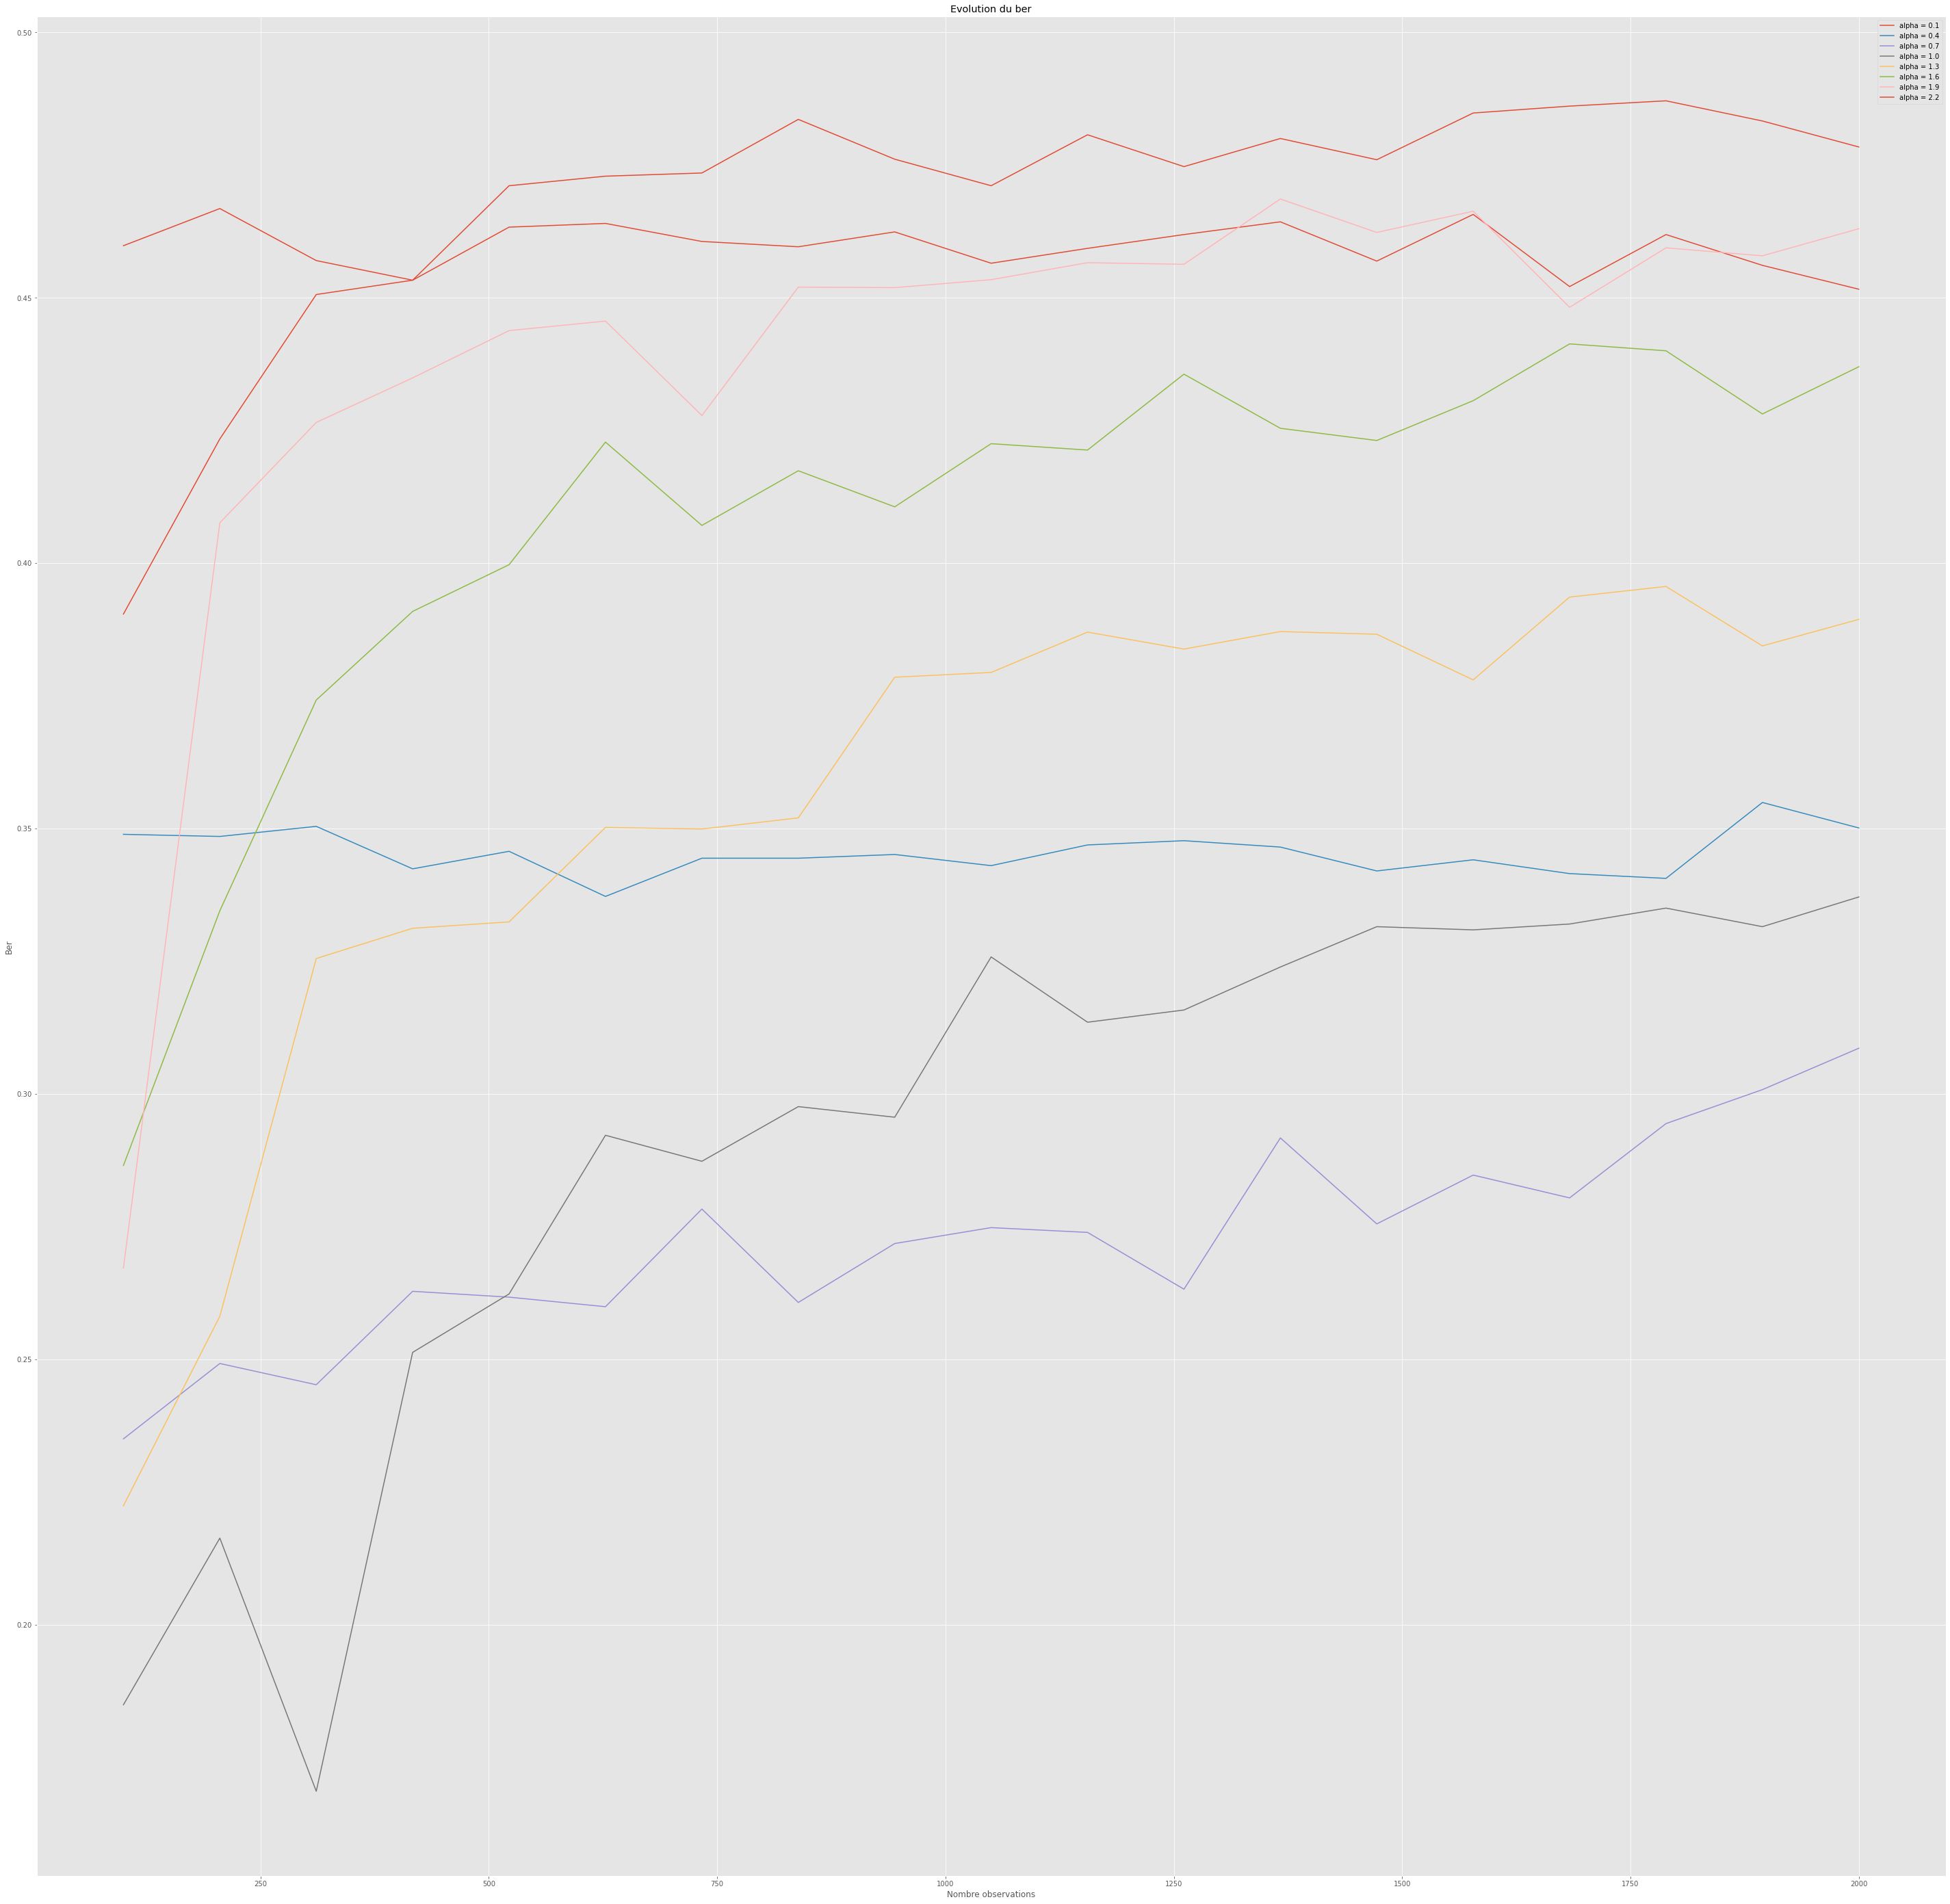

In [67]:
history_process_2(np.arange(0.1,2.3,0.3), 100,2000,100)

## Scénario 3: Attaque à messages inconnus, 2 bits
* Vérifier que l'attaque précédente ne permet pas d'estimer les deux clés. 
* Estimer au moins l'une des clés utilisée
    * Note: on pourra utiliser l'algorithme `FastICA` pour estimer les deux composantes indépendantes 
    * Pour cela on pourra appeler la fonction fastica en spécifiant que l'analyse en composantes indépendantes s'effectuera sur un sous espace engendré par les *deux premières composantes principales* (`n_components=2`), et en récupérant les colonnes de la matrice de mélange A (obtenue via `ica.mixing_`) estimé par l'algorithme.
    * Vérifier, à l'aide de la corrélation normalisée, que cette méthode permet d'estimer la clé `k1`
* Mettre en place l'attaque qui permet d'effacter un bit sur les deux
* Etudier l'impact de $N_{o}$ et de $\alpha$ sur le BER après attaque

In [ ]:
# 3rd scenario, 2 bits
print('3rd scenario, 2bits')

m1 = np.sign(np.random.randn(Ni,1))#Scenario with unknow messages, first bit
m2 = np.sign(np.random.randn(Ni,1))#Scenario with unknow messages, second bit

k1 = np.random.randn(Nv,1) # Generate de Watermark
k1 = k1 / np.sqrt(np.dot(k1.T,k1)) # Normalize the watermark

k2 = np.random.randn(Nv,1) # Generate de Watermark
k2 = k2 / np.sqrt(np.dot(k2.T,k2)) # Normalize the watermark

def do_process(alpha,No):
    
    print('alpha: ',alpha)
    print('No: ',No)

    X = np.random.randn(Nv,Ni) # Generate Ni random host vectors

    K = np.dot(k1,m1.T) + np.dot(k2,m2.T) # Generate the matrix of watermarks (each column contains m1_i*k)

    W = alpha*K

    Y = X + W # perform embedding

    
    Y_obs = Y[:,:No]
    # TO DO
    
    # hatk_1 = TO DO
    hatk_1 = np.zeros(Nv)# To change
    
    hatk_1 = hatk_1/np.linalg.norm(hatk_1)
    hatk_1 = np.reshape(hatk_1,(Nv,1))

    corrN_1 = norm_corr(hatk_1,k1) # Compute the Normalised correlation
    print('Normalised correlation between the estimated key and k1')
    print(corrN_1)

    corrN_2 = norm_corr(hatk_1,k2) # Compute the Normalised correlation
    print('Normalised correlation between the estimated key and k2')
    print(corrN_2)

    # Perform the attack
    # To do
    YA_1 = np.zeros((Nv,Ni))# To change   
    
    
    print('bit error rate after security attack for the first bit')
    print(ber(YA_1,m1,k1))

    print('bit error rate after security attack for the second bit')
    print(ber(YA_1,m2,k2))
    print('\n\n')



alpha = 2 # Tune the power of the watermark here

# One example, can be used to draw plots
for No in range(100,2000,100):
    do_process(alpha,No)

## Pour conclure: Etude de la robustesse
* Calculer le taux d'erreur (BER pour Bit Error Rate) théorique après ajout de bruit (voir cours)
* Etudier l'évolution de la robustesse (via le BER) en fonction de la distortion (via le DWR) 
* Quel compromis observe-t-on entre la sécurité et la robustesse?


# Stéganalyse par apprentissage
## Mise en route:
* Récupèrer les caractéristiques ici: https://nextcloud.univ-lille.fr/index.php/s/i6xr4JykqAASapN
* On charge les caractéristiques extraites à partir des images Cover et Stego pour d=3 (dimension de l'histogramme multivarié) et T=3 (seuil)

In [2]:
cover = np.loadtxt('Features/cover-spam-N=3-T=3.csv')
stego = np.loadtxt('Features/stego-0.20-lsb-spam-N=3-T=3.csv')

In [4]:
print(cover.shape)
print(stego.shape)

(10000, 686)
(10000, 686)


**Quelle est la dimension des caractéristiques ? Pourquoi ?**

**Entrainer un classifieur linéaire avec 5000 images en apprentissage et en test (effectuer une permutation pseudo-aléatoire des images avant l'apprentissage)**

**Vérifier l'impact de l'apprentissage par paires**

**Effectuer plusieurs entrainements/test successifs sur des ensembles d'apprentissage et de test différents (permutations différentes), commentez la variabilité**

**Comparer avec les caractéristiques produites pour N = 2 et T = 4 (fournies), expliquer la différence de performance**